In [76]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn
import re
%matplotlib inline

In [6]:
opensecrets_lobbying_url = "http://www.opensecrets.org/lobby/"

In [7]:
r = requests.get(opensecrets_lobbying_url)

In [8]:
r.status_code

200

In [9]:
soup = BeautifulSoup(r.text, 'html.parser')

In [17]:
lobbyingSummaryTable = soup.find("table", { "class": "lobSumTableIn"})

In [62]:
year_tds = lobbyingSummaryTable.findAll("td", {"align": "center"})
years = [td.string for td in tds]

In [64]:
amount_imgs = lobbyingSummaryTable.findAll("img")
amounts_str = [amount_img['alt'] for amount_img in amount_imgs]
amounts = [re.sub("[^\d\.]", "", amount) for amount in amounts_str]

In [73]:
lobbyingSummary = pd.DataFrame(index = years)

In [74]:
lobbyingSummary.insert(loc=0,
                       column="Lobbying Total", 
                       value=pd.to_numeric(amounts))

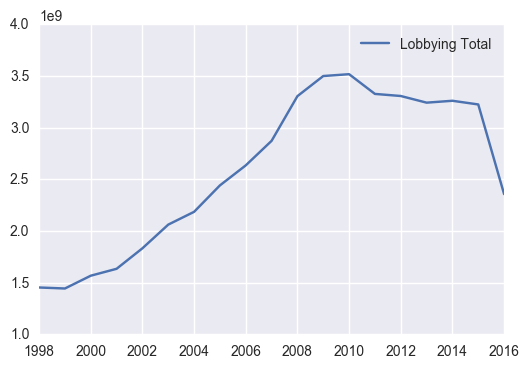

In [77]:
lobbyingSummary.plot()

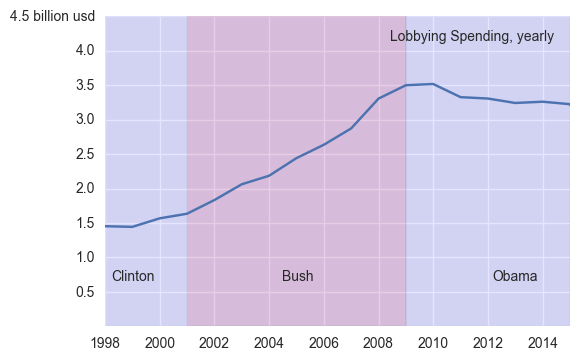

In [168]:
fig, ax = plt.subplots()
plt.xlim(1998, 2015)
plt.ylim(0, 4500000000)

#ax.ticklabel_format(useOffset=False)
plt.axvspan(1998, 2009, facecolor="b", alpha=0.1) # bill
plt.axvspan(2001, 2009, facecolor="r", alpha=0.1) # w
plt.axvspan(2009, 2015, facecolor="b", alpha=0.1) # obama
plt.plot(lobbyingSummary.index.values, lobbyingSummary['Lobbying Total'])
plt.figtext(0.135, 0.24, 'Clinton')
plt.figtext(0.42, 0.24, 'Bush')
plt.figtext(0.77, 0.24, 'Obama')
plt.figtext(0.6, 0.84, "Lobbying Spending, yearly")

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[-1] = labels[-1] + " billion usd"
labels[0] = ""

ax.set_yticklabels(labels)

plt.show()

In [151]:
lobbyingSummary["Change"] = lobbyingSummary.pct_change()
lobbyingSummary = lobbyingSummary.fillna(0)

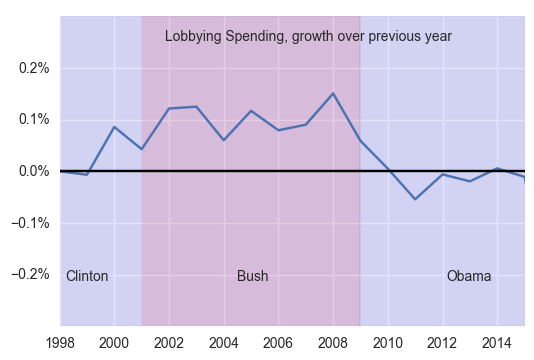

In [166]:
fig, ax = plt.subplots()
plt.xlim(1998, 2015)
plt.ylim(-.3, .3)

#ax.ticklabel_format(useOffset=False)
plt.axvspan(1998, 2009, facecolor="b", alpha=0.1) # bill
plt.axvspan(2001, 2009, facecolor="r", alpha=0.1) # w
plt.axvspan(2009, 2015, facecolor="b", alpha=0.1) # obama
plt.plot(lobbyingSummary.index.values, lobbyingSummary['Change'])
plt.figtext(0.135, 0.24, 'Clinton')
plt.figtext(0.42, 0.24, 'Bush')
plt.figtext(0.77, 0.24, 'Obama')
plt.figtext(0.3, 0.84, "Lobbying Spending, growth over previous year")

fig.canvas.draw()
labels = [item.get_text() + "%" for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)

# draw diagonal line from (70, 90) to (90, 200)
matplotlib.pyplot.axhline(color="k")

plt.show()